In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# # Construct a tf.data.Dataset
# ds = tfds.load('mnist', split='train', shuffle_files=True)

# # Build your input pipeline
# ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
# for example in ds.take(1):
#   image, label = example["image"], example["label"]

# (train_ds, test_ds), info_ds = tfds.load('wine_quality', split=['train[:75%]', 'train[75%:]'], shuffle_files=True, as_supervised=True, with_info=True)
# tfds.as_dataframe(train_ds.take(4), info_ds)

# Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [82]:
def get_train_and_test_splits(train_size, batch_size=1):
    # We prefetch with a buffer the same size as the dataset because th dataset
    # is very small and fits into memory.
    dataset = (
        tfds.load(name="wine_quality", as_supervised=True, split="train")
        .map(lambda x, y: (x, tf.cast(y, tf.float32)))
        .prefetch(buffer_size=tf.data.AUTOTUNE)
        .cache()
    )
    # We shuffle with a buffer the same size as the dataset.
    train_dataset = (
        dataset.take(train_size).shuffle(buffer_size=train_size).batch(batch_size)
    )
    test_dataset = dataset.skip(train_size).batch(batch_size)

    return train_dataset, test_dataset

In [87]:
dataset_size = 4898
batch_size = 256
train_size = int(dataset_size * 0.85)
train, test = get_train_and_test_splits(train_size, batch_size)

In [88]:
train

<BatchDataset shapes: ({alcohol: (None,), chlorides: (None,), citric acid: (None,), density: (None,), fixed acidity: (None,), free sulfur dioxide: (None,), pH: (None,), residual sugar: (None,), sulphates: (None,), total sulfur dioxide: (None,), volatile acidity: (None,)}, (None,)), types: ({alcohol: tf.float32, chlorides: tf.float32, citric acid: tf.float32, density: tf.float32, fixed acidity: tf.float32, free sulfur dioxide: tf.float32, pH: tf.float32, residual sugar: tf.float32, sulphates: tf.float64, total sulfur dioxide: tf.float32, volatile acidity: tf.float32}, tf.float32)>

In [92]:
FEATURE_NAMES = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]


def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = tf.keras.layers.Input(
            name=feature_name, shape=(1,), dtype=tf.float32
        )
    return inputs

In [108]:
inputs = create_model_inputs()
input_values = [value for _, value in sorted(inputs.items())]
features = tf.keras.layers.concatenate(input_values)
x = tf.keras.layers.Normalization()(features)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [109]:
model.compile(optimizer='Adam', loss='mse')

In [110]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
17/17 [==============================] - 1s 17ms/step - loss: 61.1476 - val_loss: 23.5034
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 10.3810 - val_loss: 6.6215
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 4.9863 - val_loss: 3.5911
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 3.6060 - val_loss: 2.9685
Epoch 5/10
17/17 [==============================] - 0s 10ms/step - loss: 2.9478 - val_loss: 2.4445
Epoch 6/10
17/17 [==============================] - 0s 10ms/step - loss: 2.3499 - val_loss: 1.9509
Epoch 7/10
17/17 [==============================] - 0s 10ms/step - loss: 1.8192 - val_loss: 1.4466
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 1.2544 - val_loss: 0.9639
Epoch 9/10
17/17 [==============================] - 0s 12ms/step - loss: 0.8899 - val_loss: 0.7633
Epoch 10/10
17/17 [==============================] - 0s 10ms/step - loss: 0.7569 - val_loss: 0.6834


## Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?


In [105]:
## Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

z = tf.keras.layers.Normalization()(features)
for i in range(4):
  z = tf.keras.layers.Dense(64)(z)
outputs = tf.keras.layers.Dense(1, activation='linear')(z)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='Adam', loss='mse')

In [106]:
# model2.summary()

In [107]:
model2.fit(train, epochs=10, validation_data=test)

Epoch 1/10
17/17 [==============================] - 1s 18ms/step - loss: 184.1071 - val_loss: 14.6813
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 19.7233 - val_loss: 7.0935
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 5.9101 - val_loss: 3.9109
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 2.6820 - val_loss: 1.7774
Epoch 5/10
17/17 [==============================] - 0s 29ms/step - loss: 1.6383 - val_loss: 1.1237
Epoch 6/10
17/17 [==============================] - 0s 11ms/step - loss: 1.0439 - val_loss: 0.7969
Epoch 7/10
17/17 [==============================] - 0s 10ms/step - loss: 0.7899 - val_loss: 0.6812
Epoch 8/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7060 - val_loss: 0.6304
Epoch 9/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6648 - val_loss: 0.6230
Epoch 10/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6691 - val_loss: 0.6335


# Try and improve the results we got on the insurance dataset, some things you might want to try include:


## Building a larger model (how does one with 4 dense layers go?).


In [111]:
import pandas as pd

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv", low_memory=False)

# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [115]:
subset = ['sex', 'smoker', 'region']
dumIns = pd.get_dummies(insurance, columns=subset)
dumIns.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [123]:
X = dumIns.drop('charges', axis=1)
y = dumIns.charges

In [124]:
X = X.sample(len(X))
idx = int(.75*len(X))
X_train, X_test = X[:idx], X[idx:]

In [127]:
y_train, y_test = y.loc[X_train.index], y.loc[X_test.index]

In [130]:
# tf.data.Dataset.from_tensor_slices(X_train) # Tempting to do this, but fit skips the necessity with pd df
# more indepth: https://colab.research.google.com/github/adammichaelwood/tf-docs/blob/csv-feature-columns/site/en/r2/tutorials/load_data/csv.ipynb#scrollTo=kPWkC4_1l3IG

In [133]:
tf.random.set_seed(42) 

ins1 = tf.keras.Sequential()
ins1.add(tf.keras.layers.Input([X_train.shape[1],]))
ins1.add(tf.keras.layers.Normalization())
ins1.add(tf.keras.layers.Dense(100, activation='relu'))
ins1.add(tf.keras.layers.Dense(100, activation='relu'))
ins1.add(tf.keras.layers.Dense(100, activation='relu'))
ins1.add(tf.keras.layers.Dense(100, activation='relu'))
ins1.add(tf.keras.layers.Dense(1, activation='linear'))

ins1.compile(optimizer='Adam', loss='mae')

In [134]:
history = ins1.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 21ms/step - loss: 12967.7793 - val_loss: 13783.4639
Epoch 2/200
32/32 [==============================] - 0s 11ms/step - loss: 11405.4111 - val_loss: 9206.5869
Epoch 3/200
32/32 [==============================] - 0s 10ms/step - loss: 7459.7207 - val_loss: 8163.5244
Epoch 4/200
32/32 [==============================] - 0s 11ms/step - loss: 7096.9370 - val_loss: 7930.1538
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 6968.8101 - val_loss: 7837.1133
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 6851.7329 - val_loss: 7725.5566
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 6725.3086 - val_loss: 7605.5972
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 6598.2803 - val_loss: 7489.8433
Epoch 9/200
32/32 [==============================] - 0s 7ms/step - loss: 6450.8267 - val_loss: 7405.7637
Epoch 10/200
32/32 [===========================

## Increasing the number of units in each layer.


In [136]:
tf.random.set_seed(42)

ins2 = tf.keras.Sequential()
ins2.add(tf.keras.layers.Input([X_train.shape[1],]))
ins2.add(tf.keras.layers.Normalization())
ins2.add(tf.keras.layers.Dense(256, activation='relu'))
ins2.add(tf.keras.layers.Dense(256, activation='relu'))
ins2.add(tf.keras.layers.Dense(1))


In [137]:
ins2.compile(optimizer='Adam', loss='mae')
ins2.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 10ms/step - loss: 12940.6348 - val_loss: 13797.7197
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 12427.9893 - val_loss: 12772.8359
Epoch 3/200
32/32 [==============================] - 0s 7ms/step - loss: 10624.3330 - val_loss: 10057.0137
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 7873.1172 - val_loss: 8141.3726
Epoch 5/200
32/32 [==============================] - 0s 7ms/step - loss: 7242.3535 - val_loss: 8086.2778
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 7187.7705 - val_loss: 8037.4897
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 7129.9531 - val_loss: 7989.4771
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 7079.0254 - val_loss: 7938.7954
Epoch 9/200
32/32 [==============================] - 0s 7ms/step - loss: 7019.3477 - val_loss: 7894.5283
Epoch 10/200
32/32 [============================

## Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?


In [138]:
ins2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01), loss='mae')
ins2.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 19ms/step - loss: 2764.7249 - val_loss: 2927.1997
Epoch 2/200
32/32 [==============================] - 0s 9ms/step - loss: 2321.7981 - val_loss: 2553.9653
Epoch 3/200
32/32 [==============================] - 0s 10ms/step - loss: 2377.8611 - val_loss: 2784.2446
Epoch 4/200
32/32 [==============================] - 0s 11ms/step - loss: 2243.2825 - val_loss: 2725.2463
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 2265.5710 - val_loss: 2444.1848
Epoch 6/200
32/32 [==============================] - 0s 10ms/step - loss: 2276.7546 - val_loss: 3172.8018
Epoch 7/200
32/32 [==============================] - 0s 10ms/step - loss: 2301.3699 - val_loss: 2633.1650
Epoch 8/200
32/32 [==============================] - 0s 10ms/step - loss: 2216.9189 - val_loss: 2483.4604
Epoch 9/200
32/32 [==============================] - 0s 9ms/step - loss: 2302.7544 - val_loss: 2734.5078
Epoch 10/200
32/32 [============================

In [139]:
# What happens if you train for longer (say 300 epochs instead of 200)?
ins2.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 8ms/step - loss: 1585.3306 - val_loss: 2059.9543
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 1637.5115 - val_loss: 1915.4528
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1613.0405 - val_loss: 2026.5280
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1657.9374 - val_loss: 2033.1953
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1574.2886 - val_loss: 1988.8153
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1606.2623 - val_loss: 1994.4926
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 1570.5277 - val_loss: 1991.3673
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 1680.0189 - val_loss: 1880.2126
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 1598.4630 - val_loss: 1979.2192
Epoch 10/100
32/32 [==============================] - 0

# Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.


In [140]:
(X_train, y_train), (X_test, y_test) = \
\
 tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)


65536/57026 [==================================] - 0s 0us/step


In [142]:
X_train.shape

(404, 13)

In [148]:
bos = tf.keras.Sequential()
bos.add(tf.keras.layers.Input([X_train.shape[1]]))
bos.add(tf.keras.layers.Normalization())
bos.add(tf.keras.layers.Dense(32, activation='relu'))
bos.add(tf.keras.layers.Dense(32, activation='relu'))
bos.add(tf.keras.layers.Dense(1))

bos.compile(optimizer='Adam', loss='mse', metrics='mae')

In [149]:
history = bos.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 21ms/step - loss: 5187.7764 - mae: 64.5090 - val_loss: 826.0698 - val_mae: 26.4149
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 866.2758 - mae: 22.6933 - val_loss: 766.4521 - val_mae: 21.0634
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 308.1059 - mae: 12.2945 - val_loss: 103.4961 - val_mae: 8.1616
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 133.5363 - mae: 9.3606 - val_loss: 113.6791 - val_mae: 8.3269
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 101.1086 - mae: 7.3868 - val_loss: 105.3358 - val_mae: 7.6446
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 84.8667 - mae: 6.6122 - val_loss: 84.2040 - val_mae: 7.0857
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 75.8353 - mae: 6.4311 - val_loss: 79.3787 - val_mae: 6.8857
Epoch 8/20
13/13 [==============================] - 0s 7ms/

In [150]:
history.history

{'loss': [5187.7763671875,
  866.2758178710938,
  308.1059265136719,
  133.53631591796875,
  101.10860443115234,
  84.8666763305664,
  75.83527374267578,
  71.47501373291016,
  67.6399154663086,
  64.94342803955078,
  62.81817626953125,
  61.33600616455078,
  60.218040466308594,
  58.820255279541016,
  58.063419342041016,
  57.004844665527344,
  56.24446487426758,
  55.60466766357422,
  55.17719268798828,
  54.76469802856445],
 'mae': [64.50896453857422,
  22.693267822265625,
  12.294504165649414,
  9.360591888427734,
  7.386808395385742,
  6.612185001373291,
  6.431079864501953,
  6.179832935333252,
  5.925902843475342,
  5.761238098144531,
  5.639997959136963,
  5.570934295654297,
  5.385799407958984,
  5.473673343658447,
  5.265995979309082,
  5.343149185180664,
  5.237521648406982,
  5.216403007507324,
  5.137425422668457,
  5.300925254821777],
 'val_loss': [826.0697631835938,
  766.4521484375,
  103.4960708618164,
  113.67911529541016,
  105.33583068847656,
  84.20398712158203,
  

In [163]:
import matplotlib.pyplot as plt

In [164]:
def plot_history(history, metric=None):
  ans = history.history

  pd.Series(ans['loss']).plot()
  pd.Series(ans[f'val_loss']).plot()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  if metric is not None:
    pd.Series(ans[metric]).plot()
    pd.Series(ans[f'val_{metric}']).plot()
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.show()

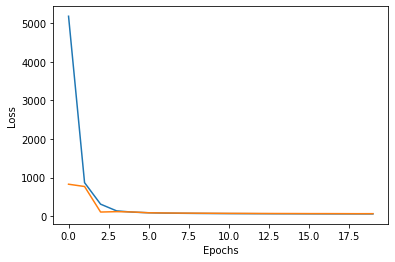

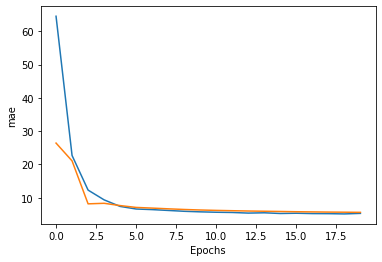

In [166]:
plot_history(history, metric='mae')